In [1]:
library('plm')

In [2]:
data(Grunfeld, package = 'plm')

In [31]:
Grunfeld

,firm,year,inv,value,capital
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,1935,317.6,3078.5,2.8
2,1,1936,391.8,4661.7,52.6
3,1,1937,410.6,5387.1,156.9
4,1,1938,257.7,2792.2,209.2
5,1,1939,330.8,4313.2,203.4
6,1,1940,461.2,4643.9,207.2
7,1,1941,512.0,4551.2,255.2
8,1,1942,448.0,3244.1,303.7
9,1,1943,499.6,4053.7,264.1


In [6]:
library(ggplot2)

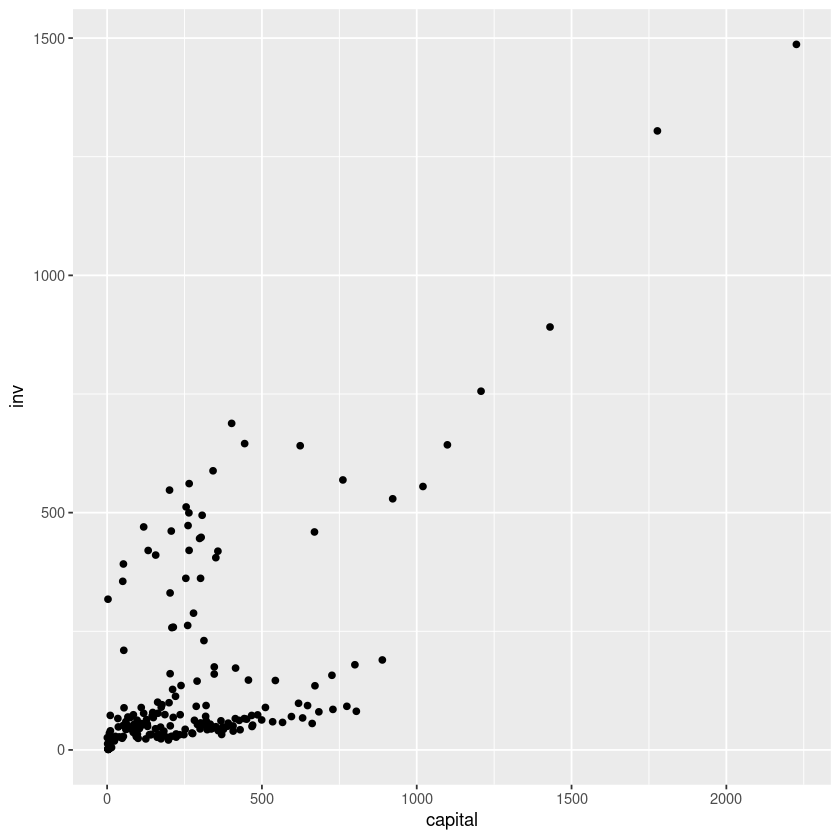

In [7]:
ggplot(data=Grunfeld, aes(x=capital, y=inv))+
    geom_point()

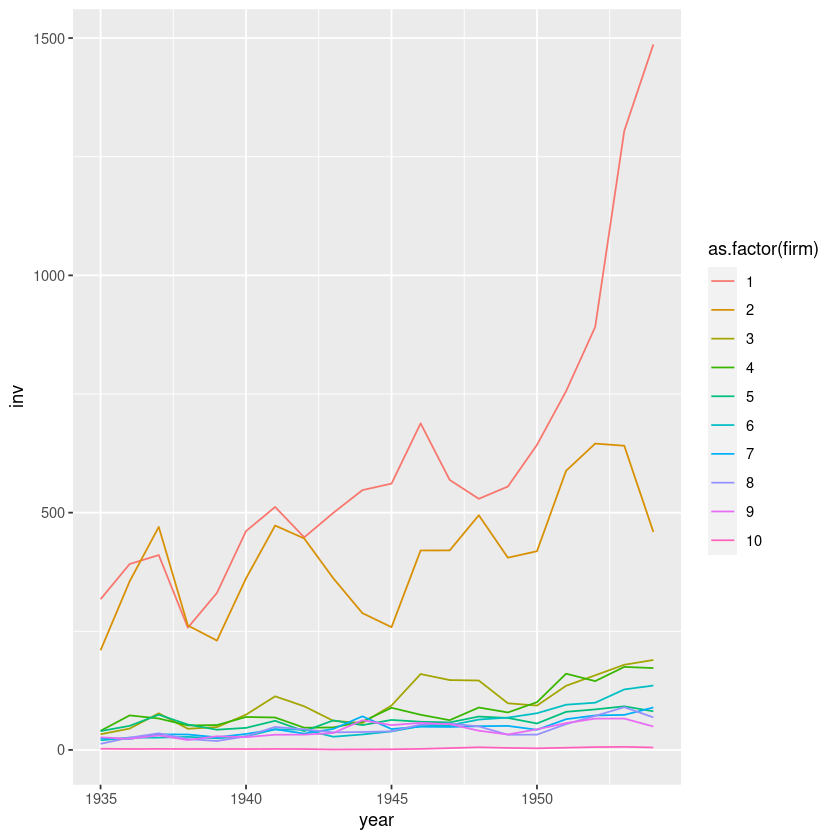

In [10]:
ggplot(data=Grunfeld, aes(x=year, y=inv))+
    geom_line(aes(colour=as.factor(firm)))

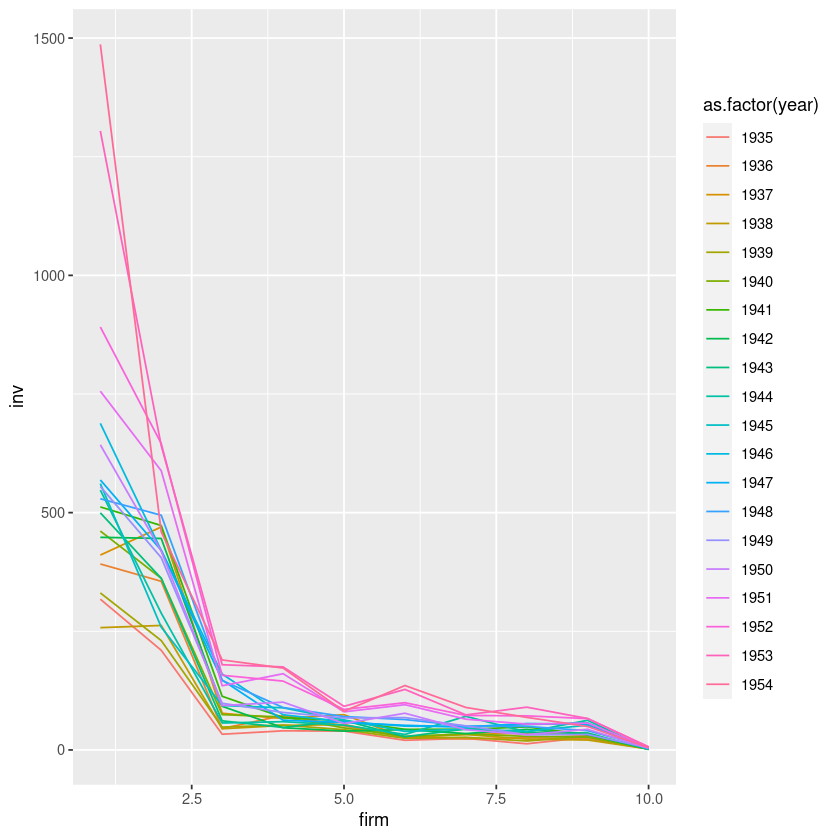

In [12]:
ggplot(data=Grunfeld, aes(x=firm, y=inv))+
    geom_line(aes(colour=as.factor(year)))

### Pooled

In [15]:
pooled_ols <- lm(inv~capital,data=Grunfeld)
summary(pooled_ols)


Call:
lm(formula = inv ~ capital, data = Grunfeld)

Residuals:
    Min      1Q  Median      3Q     Max 
-316.92  -96.45  -14.43   17.07  481.92 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.23620   15.63927    0.91    0.364    
capital      0.47722    0.03834   12.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 162.9 on 198 degrees of freedom
Multiple R-squared:  0.439,	Adjusted R-squared:  0.4362 
F-statistic: 154.9 on 1 and 198 DF,  p-value: < 2.2e-16


In [16]:
pooled_plm <- plm(inv~capital,data=Grunfeld,index=c('firm', 'year'), effect='individual', model='pooling')
summary(pooled_plm)

Pooling Model

Call:
plm(formula = inv ~ capital, data = Grunfeld, effect = "individual", 
    model = "pooling", index = c("firm", "year"))

Balanced Panel: n = 10, T = 20, N = 200

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-316.924  -96.450  -14.429   17.069  481.924 

Coefficients:
             Estimate Std. Error t-value Pr(>|t|)    
(Intercept) 14.236205  15.639266  0.9103   0.3638    
capital      0.477224   0.038339 12.4474   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    9359900
Residual Sum of Squares: 5251000
R-Squared:      0.43899
Adj. R-Squared: 0.43616
F-statistic: 154.937 on 1 and 198 DF, p-value: < 2.22e-16

### FE

#### LSDV

In [19]:
fe_lsdv <- lm(inv~capital+as.factor(firm), data=Grunfeld)
summary(fe_lsdv)


Call:
lm(formula = inv ~ capital + as.factor(firm), data = Grunfeld)

Residuals:
     Min       1Q   Median       3Q      Max 
-190.715  -20.835   -0.459   21.383  293.687 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        367.61297   18.96710  19.382  < 2e-16 ***
capital              0.37075    0.01937  19.143  < 2e-16 ***
as.factor(firm)2   -66.45535   21.23578  -3.129  0.00203 ** 
as.factor(firm)3  -413.68214   20.66845 -20.015  < 2e-16 ***
as.factor(firm)4  -326.44100   22.54586 -14.479  < 2e-16 ***
as.factor(firm)5  -486.27841   20.34373 -23.903  < 2e-16 ***
as.factor(firm)6  -350.86559   22.69651 -15.459  < 2e-16 ***
as.factor(firm)7  -436.78321   21.11352 -20.687  < 2e-16 ***
as.factor(firm)8  -356.47246   22.86642 -15.589  < 2e-16 ***
as.factor(firm)9  -436.17028   21.21684 -20.558  < 2e-16 ***
as.factor(firm)10 -366.73127   23.64118 -15.512  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual st

In [20]:
fe_lsdv <- lm(inv~0+capital+as.factor(firm), data=Grunfeld)
summary(fe_lsdv)


Call:
lm(formula = inv ~ 0 + capital + as.factor(firm), data = Grunfeld)

Residuals:
     Min       1Q   Median       3Q      Max 
-190.715  -20.835   -0.459   21.383  293.687 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
capital              0.37075    0.01937  19.143  < 2e-16 ***
as.factor(firm)1   367.61297   18.96710  19.382  < 2e-16 ***
as.factor(firm)2   301.15762   15.31806  19.660  < 2e-16 ***
as.factor(firm)3   -46.06917   16.18939  -2.846  0.00492 ** 
as.factor(firm)4    41.17196   14.40645   2.858  0.00474 ** 
as.factor(firm)5  -118.66544   17.05605  -6.957 5.52e-11 ***
as.factor(firm)6    16.74738   14.35657   1.167  0.24487    
as.factor(firm)7   -69.17024   15.46733  -4.472 1.33e-05 ***
as.factor(firm)8    11.14050   14.31023   0.778  0.43725    
as.factor(firm)9   -68.55731   15.34015  -4.469 1.35e-05 ***
as.factor(firm)10    0.88169   14.21425   0.062  0.95061    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residua

#### FD

In [22]:
fe_fd <- plm(inv~0+capital,data=Grunfeld,index=c('firm', 'year'), effect='individual', model='fd')
summary(fe_fd)

Oneway (individual) effect First-Difference Model

Call:
plm(formula = inv ~ 0 + capital, data = Grunfeld, effect = "individual", 
    model = "fd", index = c("firm", "year"))

Balanced Panel: n = 10, T = 20, N = 200
Observations used in estimation: 190

Residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -240.4   -11.7     0.1     3.5    12.6   333.2 

Coefficients:
        Estimate Std. Error t-value Pr(>|t|)    
capital 0.230780   0.059639  3.8696  0.00015 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    584410
Residual Sum of Squares: 561210
R-Squared:      0.04476
Adj. R-Squared: 0.04476
F-statistic: 14.9739 on 1 and 189 DF, p-value: 0.00014998

#### Within

In [29]:
fe_within <- plm(inv~0+capital,data=Grunfeld,index=c('firm', 'year'), effect='individual', model='within')
summary(fe_within)

Oneway (individual) effect Within Model

Call:
plm(formula = inv ~ 0 + capital, data = Grunfeld, effect = "individual", 
    model = "within", index = c("firm", "year"))

Balanced Panel: n = 10, T = 20, N = 200

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-190.71466  -20.83474   -0.45862   21.38262  293.68714 

Coefficients:
        Estimate Std. Error t-value  Pr(>|t|)    
capital 0.370750   0.019368  19.143 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    2244400
Residual Sum of Squares: 763680
R-Squared:      0.65973
Adj. R-Squared: 0.64173
F-statistic: 366.446 on 1 and 189 DF, p-value: < 2.22e-16

In [24]:
pFtest(fe_fd, pooled_plm)
# choosed FE, not pooled


	F test for individual effects

data:  inv ~ 0 + capital
F = 123.39, df1 = 9, df2 = 189, p-value < 2.2e-16
alternative hypothesis: significant effects


### Random effects

In [27]:
re_plm <- plm(inv~capital,data=Grunfeld,index=c('firm', 'year'), effect='individual', model='random')
summary(re_plm)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = inv ~ capital, data = Grunfeld, effect = "individual", 
    model = "random", index = c("firm", "year"))

Balanced Panel: n = 10, T = 20, N = 200

Effects:
                   var  std.dev share
idiosyncratic  4040.63    63.57 0.135
individual    25949.52   161.09 0.865
theta: 0.9121

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-164.0821  -22.2955   -3.7463   16.9121  319.9564 

Coefficients:
             Estimate Std. Error z-value Pr(>|z|)    
(Intercept) 43.246697  51.411319  0.8412   0.4002    
capital      0.372120   0.019316 19.2652   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    2299300
Residual Sum of Squares: 799910
R-Squared:      0.65211
Adj. R-Squared: 0.65036
Chisq: 371.149 on 1 DF, p-value: < 2.22e-16

In [28]:
plmtest(pooled_plm, effect = 'individual', type=c('bp'))
# choose RE, not pooled


	Lagrange Multiplier Test - (Breusch-Pagan) for balanced panels

data:  inv ~ capital
chisq = 1285.1, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects


In [30]:
phtest(fe_within, re_plm)
# choose RE, not FE 


	Hausman Test

data:  inv ~ 0 + capital
chisq = 0.93423, df = 1, p-value = 0.3338
alternative hypothesis: one model is inconsistent
